In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [92]:
## Clustering around KM per liter VS Horsepower
dataset = pd.read_csv('cars.csv')
features = dataset[['kmperliter','horsepower']]

In [93]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

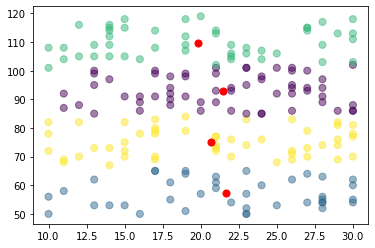

In [94]:
# Plot our data about the cars (KmPerLiter VS Horsepower) and the centroids we have found for the clusters
plt.scatter(dataset['kmperliter'], dataset['horsepower'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

,make,year,newprice,kmperliter,km,horsepower,gearbox,fueltype,doornumber,price,cluster
1,Dodge,2013,405296,24,43742,76,1,1,3,375616.9870,0
5,Fiat,2010,407583,28,13039,74,1,1,3,401939.1639,0
17,Mazda,2000,393222,26,114322,72,0,0,3,379695.6528,0
35,Dodge,2014,413044,21,14014,77,1,1,3,391623.3216,0
45,Alfa Romeo,2010,561268,21,171316,74,1,1,3,504420.9120,0
50,Jaguar,2008,606814,22,182037,76,0,0,3,493313.8517,0
55,Chevrolet,2012,373260,30,54782,78,0,0,3,324456.3968,0
56,Fiat,2015,457755,21,90790,72,1,0,3,409745.7930,0
64,Dodge,2010,646918,27,71409,73,1,1,3,633074.6934,0
75,Honda,2014,336526,23,30061,74,1,0,3,312672.9221,0


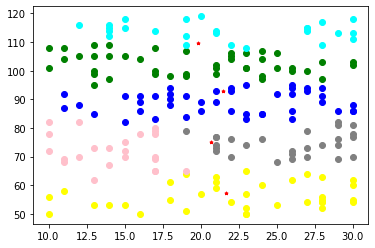

In [98]:
prediction = kmeans.predict(features)
dataset['cluster'] = prediction
cluster_one = dataset[dataset['cluster'] == 0][['kmperliter','horsepower']]
cluster_two = dataset[dataset['cluster'] == 1][['kmperliter','horsepower']]
cluster_three = dataset[dataset['cluster'] == 2][['kmperliter','horsepower']]
cluster_four = dataset[dataset['cluster'] == 3][['kmperliter','horsepower']]
cluster_five = dataset[dataset['cluster'] == 4][['kmperliter','horsepower']]
cluster_six = dataset[dataset['cluster'] == 5][['kmperliter','horsepower']]

plt.scatter(cluster_one['kmperliter'], cluster_one['horsepower'], c="grey")
plt.scatter(cluster_two['kmperliter'], cluster_two['horsepower'], c="green")
plt.scatter(cluster_three['kmperliter'], cluster_three['horsepower'], c="blue")
plt.scatter(cluster_four['kmperliter'], cluster_four['horsepower'], c="yellow")
plt.scatter(cluster_five['kmperliter'], cluster_five['horsepower'], c="pink")
plt.scatter(cluster_six['kmperliter'], cluster_six['horsepower'], c="cyan")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, marker='*')

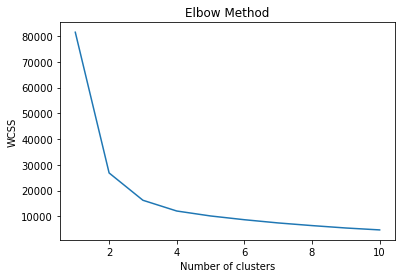

In [96]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

array([1, 0, 1, 2, 1, 0, 2, 5, 1, 5, 1, 5, 1, 2, 2, 4, 4, 0, 4, 3, 4, 3,
       2, 3, 2, 2, 5, 5, 2, 2, 4, 1, 2, 1, 5, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 3, 0, 2, 3, 4, 1, 0, 0, 5, 3, 2, 2, 3, 3, 2, 0, 4,
       1, 5, 2, 1, 5, 1, 1, 1, 4, 0, 0, 3, 2, 0, 4, 1, 3, 3, 4, 3, 2, 4,
       1, 2, 0, 5, 0, 2, 2, 5, 1, 2, 1, 5, 0, 2, 5, 2, 2, 1, 0, 3, 1, 4,
       2, 0, 2, 3, 1, 5, 5, 3, 4, 4, 2, 1, 2, 4, 3, 5, 1, 1, 0, 3, 1, 3,
       3, 0, 1, 3, 1, 4, 3, 4, 1, 2, 2, 3, 0, 3, 2, 4, 5, 3, 1, 2, 1, 0,
       1, 4, 2, 1, 3, 1, 3, 3, 3, 5, 1, 3, 3, 5, 3, 3, 4, 1, 5, 1, 5, 4,
       2, 2, 0, 5, 0, 0, 5, 3, 0, 3, 3, 0, 3, 2, 1, 4, 2, 1, 5, 5, 0, 2,
       4], dtype=int32)

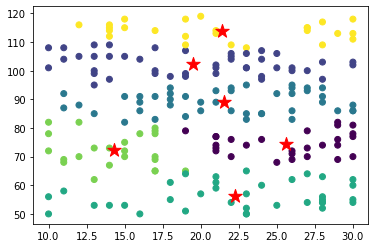

In [97]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
display(pred_y)
plt.scatter(features['kmperliter'], features['horsepower'], c=kmeans.labels_.astype('float'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')